<a href="https://colab.research.google.com/github/ghonaimy/project-/blob/main/Thesis_code_ANN_vs_Other_models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import itertools
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.impute import SimpleImputer
%matplotlib inline

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

df= pd.read_csv(r'https://github.com/ghonaimy/project-/raw/main/Walmart%20(1)%20(1).csv')

df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106,1497908.58,NaN,NaN,NaN
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106,1498716.41,NaN,NaN,NaN
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106,1499524.24,NaN,NaN,NaN
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106,1500332.07,NaN,NaN,NaN
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106,1501139.90,NaN,NaN,NaN


### Data cleaning:

In [ ]:
df.isnull().sum()

Store               0
Date                0
Weekly_Sales        0
Holiday_Flag        0
Temperature         0
Fuel_Price          0
CPI                 0
Unemployment        0
Linear trend        0
Unnamed: 9       6435
Unnamed: 10      6435
Unnamed: 11      6434
dtype: int64

In [ ]:
df.drop(['Unnamed: 9'], axis="columns", inplace=True)
df.drop(['Unnamed: 10'], axis="columns", inplace=True)
df.drop(['Unnamed: 11'], axis="columns", inplace=True)


In [ ]:
df.loc[df['Store']==1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106,1497908.58
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106,1498716.41
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106,1499524.24
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106,1500332.07
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106,1501139.90
...,...,...,...,...,...,...,...,...,...
138,1,28/09/2012,1437059.26,0,76.08,3.666,222.981658,6.908,1609388.90
139,1,05/10/2012,1670785.97,0,68.55,3.617,223.181477,6.573,1610196.73
140,1,12/10/2012,1573072.81,0,62.99,3.601,223.381296,6.573,1611004.56
141,1,19/10/2012,1508068.77,0,67.97,3.594,223.425723,6.573,1611812.38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          6435 non-null   int64  
 1   Date           6435 non-null   object 
 2   Weekly_Sales   6435 non-null   float64
 3   Holiday_Flag   6435 non-null   int64  
 4   Temperature    6435 non-null   float64
 5   Fuel_Price     6435 non-null   float64
 6   CPI            6435 non-null   float64
 7   Unemployment   6435 non-null   float64
 8   Linear trend   6435 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 452.6+ KB


In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend
0,1,05/02/2010,1643690.90,0,42.31,2.572,211.096358,8.106,1497908.58
1,1,12/02/2010,1641957.44,1,38.51,2.548,211.242170,8.106,1498716.41
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106,1499524.24
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106,1500332.07
4,1,05/03/2010,1554806.68,0,46.50,2.625,211.350143,8.106,1501139.90


In [ ]:
Y = df['Weekly_Sales']
X = df.drop(['Unemployment','Date','Weekly_Sales'],axis=1)
#X = df.drop(['Unemployment'],axis=1)

X.shape, Y.shape

((6435, 6), (6435,))

In [ ]:
df.describe().style.background_gradient(cmap = 'YlGnBu')

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Linear trend
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1046964.877562,0.069930,60.663782,3.358607,171.578394,7.999151,831022.052690
std,12.988182,564366.622054,0.255049,18.444933,0.459020,39.356712,1.875885,472464.668757
min,1.000000,209986.250000,0.000000,-2.060000,2.472000,126.064000,3.879000,42583.910000
25%,12.000000,553350.105000,0.000000,47.460000,2.933000,131.735000,6.891000,445343.775000
50%,23.000000,960746.040000,0.000000,62.670000,3.445000,182.616521,7.874000,705856.380000
75%,34.000000,1420158.660000,0.000000,74.940000,3.735000,212.743293,8.622000,1172356.360000
max,45.000000,3818686.450000,1.000000,100.140000,4.468000,227.232807,14.313000,2258373.000000


In [ ]:
l = ["Weekly_Sales","Temperature","Unemployment"]
def outlier_removal(l):
    for i in l:
        Q1  = df[i].quantile(0.25)
        Q3  = df[i].quantile(0.75)
        IQR = Q3-Q1
        Uper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        df[i]  = np.where(df[i]>Uper,Uper,(np.where(df[i]<lower,lower,df[i])))
outlier_removal(l)

### Scaling:

In [ ]:
y_scaled = np.log1p(Y)
y_scaled

0       14.312455
1       14.311400
2       14.292967
3       14.158908
4       14.256862
          ...    
6430    13.477482
6431    13.505523
6432    13.506898
6433    13.484401
6434    13.541445
Name: Weekly_Sales, Length: 6435, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y_scaled,train_size=0.8, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5148, 6), (5148,), (1287, 6), (1287,))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train.shape, x_test.shape

((5148, 6), (1287, 6))

### ANN Model:

In [ ]:
tf.random.set_seed(42)

base_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=x_test.shape[1]),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [ ]:
base_model.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
                   metrics=["mean_absolute_error"])

In [ ]:
base_model.fit(x_train,y_train, epochs=100,validation_split=0.2, verbose=1)


Epoch 1/100
129/129 [==============================] - 1s 3ms/step - loss: 11.6123 - mean_absolute_error: 11.6123 - val_loss: 9.4235 - val_mean_absolute_error: 9.4235
Epoch 2/100
129/129 [==============================] - 0s 2ms/step - loss: 6.0902 - mean_absolute_error: 6.0902 - val_loss: 2.5519 - val_mean_absolute_error: 2.5519
Epoch 3/100
129/129 [==============================] - 0s 2ms/step - loss: 1.7134 - mean_absolute_error: 1.7134 - val_loss: 1.3716 - val_mean_absolute_error: 1.3716
Epoch 4/100
129/129 [==============================] - 0s 2ms/step - loss: 1.1896 - mean_absolute_error: 1.1896 - val_loss: 1.0117 - val_mean_absolute_error: 1.0117
Epoch 5/100
129/129 [==============================] - 0s 2ms/step - loss: 0.8877 - mean_absolute_error: 0.8877 - val_loss: 0.7539 - val_mean_absolute_error: 0.7539
Epoch 6/100
129/129 [==============================] - 0s 2ms/step - loss: 0.6806 - mean_absolute_error: 0.6806 - val_loss: 0.5991 - val_mean_absolute_error: 0.5991
Epoch 7/

### Prediction:

In [ ]:
base_model_prediction=base_model.predict(x_test)
base_model_prediction

41/41 [==============================] - 0s 1ms/step


array([[14.089835],
       [14.020345],
       [13.167016],
       ...,
       [13.575307],
       [14.064229],
       [13.869428]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, base_model_prediction)
rmse = mean_squared_error(y_test, base_model_prediction, squared=False)
mse, rmse

(0.028655263981174496, 0.16927865778406473)

In [ ]:
#y_test = np.expm1(y_test)

### Accuracy ANN

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

#base_model_prediction = np.expm1(base_model_prediction)

r2_score(y_test,base_model_prediction)


print(f'MSE: {mean_squared_error(y_test, base_model_prediction)}')
print(f'RMSE: {mean_squared_error(y_test, base_model_prediction, squared=False)}')
print(f'MAE: {mean_absolute_error(y_test,base_model_prediction)}')
print(f'R2 : {round(r2_score(y_test,base_model_prediction)*100,2)} %')

# plt.figure()
# plt.xlabel('Actual')
# plt.ylabel('Prediction')
# plt.scatter(y_test, base_model_prediction)
# plt.show()

MSE: 0.028655263981174496
RMSE: 0.16927865778406473
MAE: 0.11094320511382222
R2 : 91.63 %


In [ ]:
base_model_prediction

array([[14.089835],
       [14.020345],
       [13.167016],
       ...,
       [13.575307],
       [14.064229],
       [13.869428]], dtype=float32)

In [ ]:
y_test

3949    14.015169
4555    14.035709
2235    13.134132
5204    13.176043
3524    13.485945
          ...    
4266    13.041036
867     13.090386
6383    13.633305
5804    13.995346
1098    13.927199
Name: Weekly_Sales, Length: 1287, dtype: float64

### Other modeles accuracies :

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [ ]:
def model(y_test,y_train,x_test,x_train,model):
    
    model1 = model()
    model1.fit(x_train,y_train)
    y_pred = model1.predict(x_test)

    #y_pred = np.expm1(y_pred)
 
    

    print('y_pred', y_pred)
    r2_score(y_test,y_pred)
    print('-----------------')
    print(model)
    print('-----------------')
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    print(f'RMSE: {mean_squared_error(y_test, base_model_prediction, squared=False)}')
    print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
    print(f'R2 : {round(r2_score(y_test,y_pred)*100,2)} %')

    plt.figure()
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.scatter(y_test, y_pred)
    plt.show()

y_pred [14.18249072 13.89470326 13.26126643 ... 13.47712216 13.94053123
 13.72561655]
-----------------
<class 'sklearn.linear_model._base.LinearRegression'>
-----------------
MSE: 0.1306660717148507
RMSE: 0.16927865778406473
MAE: 0.2836315333525318
R2 : 61.81 %


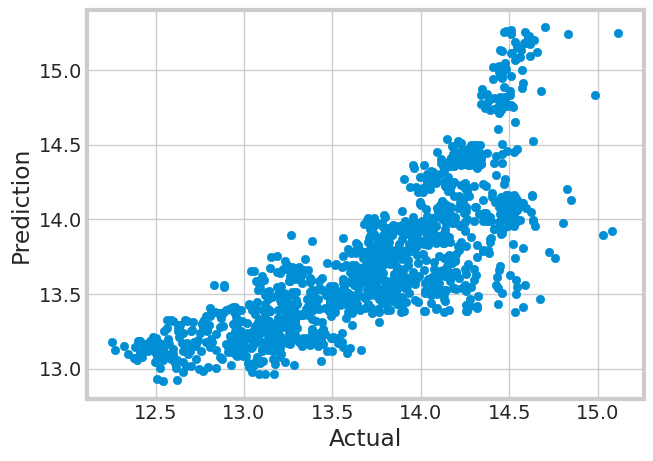

y_pred [13.70019978 13.70019978 13.70019978 ... 13.70019978 13.70019978
 13.70019978]
-----------------
<class 'sklearn.linear_model._coordinate_descent.Lasso'>
-----------------
MSE: 0.3422624112983901
RMSE: 0.16927865778406473
MAE: 0.49099074372201507
R2 : -0.02 %


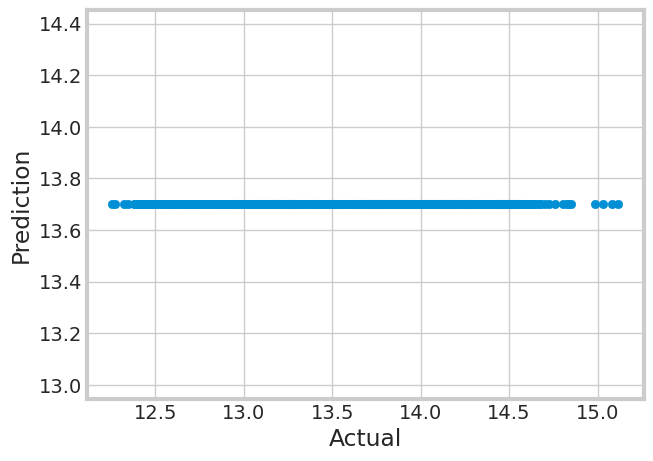

y_pred [14.18239043 13.89466239 13.26135615 ... 13.47715259 13.94047605
 13.72562541]
-----------------
<class 'sklearn.linear_model._ridge.Ridge'>
-----------------
MSE: 0.13066156197711146
RMSE: 0.16927865778406473
MAE: 0.2836254824272746
R2 : 61.82 %


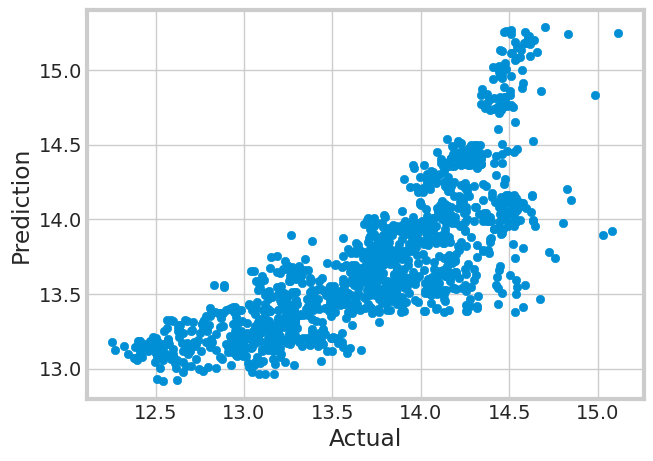

y_pred [13.70019978 13.70019978 13.70019978 ... 13.70019978 13.70019978
 13.70019978]
-----------------
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
-----------------
MSE: 0.3422624112983901
RMSE: 0.16927865778406473
MAE: 0.49099074372201507
R2 : -0.02 %


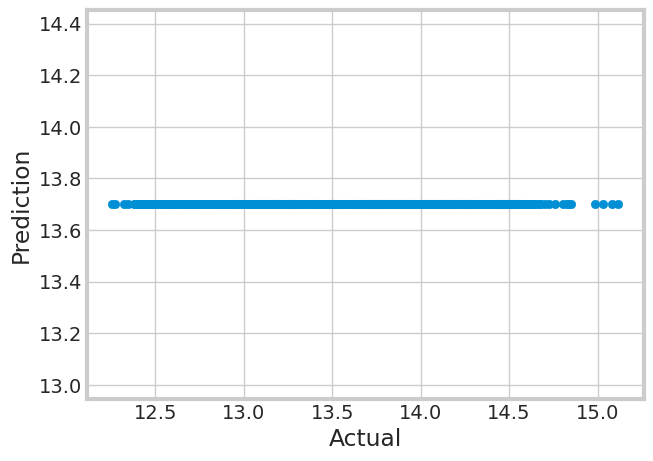

y_pred [14.07945131 14.00821839 13.1132044  ... 13.54394996 14.02398485
 13.83639601]
-----------------
<class 'sklearn.ensemble._forest.RandomForestRegressor'>
-----------------
MSE: 0.010786264571648907
RMSE: 0.16927865778406473
MAE: 0.0668298075718201
R2 : 96.85 %


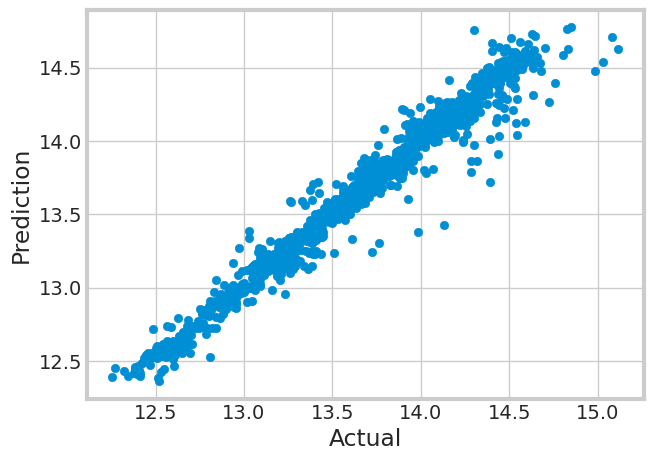

y_pred [14.03283486 13.96182385 13.1447683  ... 13.60309157 14.07601613
 13.67867569]
-----------------
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
-----------------
MSE: 0.016912168790238182
RMSE: 0.16927865778406473
MAE: 0.08190866902351039
R2 : 95.06 %


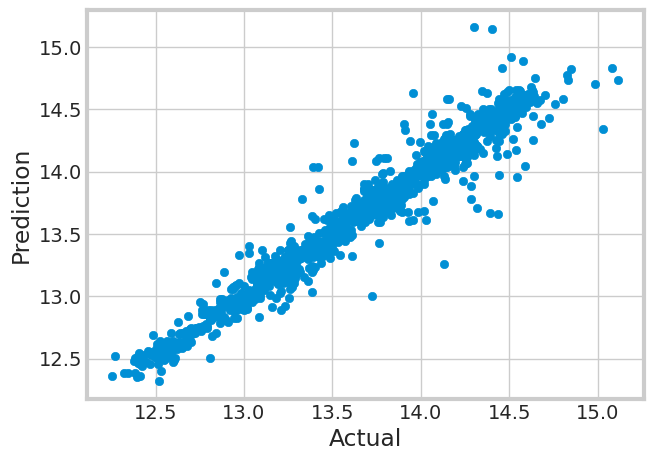

y_pred [14.09299403 13.998156   13.06565969 ... 13.50616233 14.04579659
 13.72460466]
-----------------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
-----------------
MSE: 0.02232251190177901
RMSE: 0.16927865778406473
MAE: 0.09564568694165698
R2 : 93.48 %


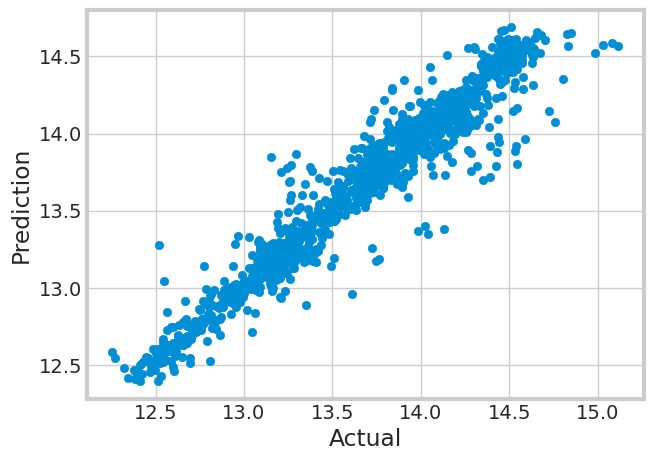

y_pred [14.0986224  13.99885175 13.14323628 ... 13.55950278 14.03526496
 13.77285698]
-----------------
<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
-----------------
MSE: 0.017724959494562507
RMSE: 0.16927865778406473
MAE: 0.09145493660663342
R2 : 94.82 %


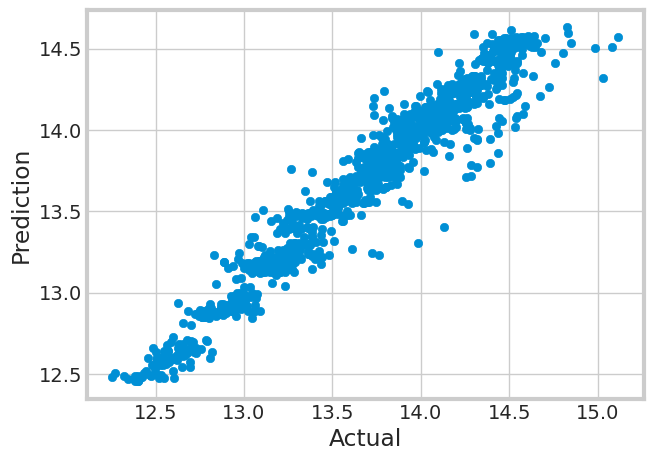

[None, None, None, None, None, None, None, None]

In [ ]:
x = [model(y_test,y_train,x_test,x_train,i) for i in [LinearRegression,Lasso,Ridge,ElasticNet,RandomForestRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor]]
x